In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.legend import Legend

In [2]:
#AHe=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_0819/Table_3_1_selected.csv",sep=',', header=0)
AHe=pd.read_csv("/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_figs&tables_sub/Table_3.csv",sep=',', header=0)

samples=np.unique(AHe.Sample_No)

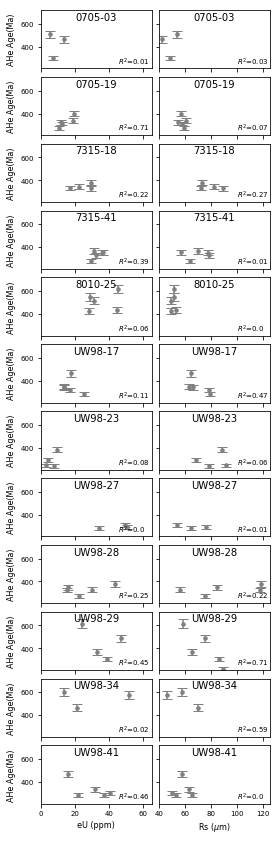

In [115]:
#fig, axs = plt.subplots(len(samples),2, figsize=((19/2)/2.54, 23/2.54))
fig, axs = plt.subplots(len(samples),2, figsize=((19/2)/2.54, 23/2))

for i in np.arange(0,len(samples),1):
    #eU plots
    ax = axs[i,0]
    ax.set_title(str(samples[i]), pad=-10, fontsize=10)
    ax.errorbar(AHe.eU_ppm[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]], yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])
    ax.text(45,245, str('$R^2$=')+str(round(r_value**2,2)), size=7)
    ax.set_xlim(0,65)
    ax.set_ylim(210,720)
    ax.set_xlabel(xlabel='eU (ppm)', fontsize=8 )
    ax.set_ylabel(ylabel='AHe Age(Ma)', fontsize=8)

    ax.tick_params(axis='both', which='major', labelsize=7)

    #Rs plots
    ax = axs[i,1]
    ax.set_title(str(samples[i]), pad=-10, fontsize=10)
    ax.errorbar(AHe.Rs_um[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]], yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(AHe.Rs_um[AHe.Sample_No==samples[i]], AHe.Corrected_Age_Ma[AHe.Sample_No==samples[i]])
    ax.text(100,245, str('$R^2$=')+str(round(r_value**2,2)), size=7)
    ax.set_xlim(40,125)
    ax.set_ylim(210,720)
    ax.set_xlabel(xlabel='Rs ($\mu$m)', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=7)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.tight_layout(pad=0.)
fig.savefig("AHe_age_vs_eU_vsRs_datarep_table3.pdf", dpi=300)

-0.4209536658212072


Text(150,650,'UW98-29')

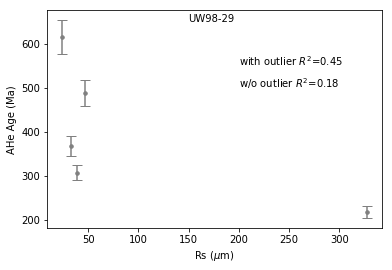

In [111]:
x=[AHe.eU_ppm[42], AHe.eU_ppm[44],AHe.eU_ppm[45], AHe.eU_ppm[46]]
y=[AHe.Corrected_Age_Ma[42], AHe.Corrected_Age_Ma[44], AHe.Corrected_Age_Ma[45], AHe.Corrected_Age_Ma[46]]
   
i=9
scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No=='UW98-29'],
                       AHe.Corrected_Age_Ma[AHe.Sample_No=='UW98-29'])[2]**2
plt.errorbar(AHe.eU_ppm[AHe.Sample_No=='UW98-29'], AHe.Corrected_Age_Ma[AHe.Sample_No=='UW98-29'], 
             yerr=AHe.Corrected_Age_Ma_1s[AHe.Sample_No==samples[i]], fmt='o', capsize=5, c='grey', ms=3.5)
#plt.plot(x,y,'o')
plt.xlabel('Rs ($\mu$m)')
plt.ylabel('AHe Age (Ma)')

plt.text(200,550,str('with outlier $R^2$=')+str(round(scipy.stats.linregress(AHe.eU_ppm[AHe.Sample_No=='UW98-29'],
                       AHe.Corrected_Age_Ma[AHe.Sample_No=='UW98-29'])[2]**2,2)))

plt.text(200,500,str('w/o outlier $R^2$=')+str(round(scipy.stats.linregress(x,
                       y)[2]**2,2)))
plt.text(150,650,'UW98-29') 